<div class="alert alert-block alert-info">
    <b>Librerias</b></div>

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import pearsonr

# Preprocesado y modelado
# ==============================================================================
import sklearn
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from numpy.linalg import matrix_rank
from skopt import BayesSearchCV

# Varios
# ==============================================================================
from scipy import stats

import warnings
import os
import missingno as msno
import random
from fitter import Fitter, get_common_distributions

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


<div class="alert alert-block alert-info">
    <b>Import</b></div>

In [2]:
# Lectura del file txt para ver que hay de relevante en su contenido.
# ============================================================
with open('C:\\Users\ASUSPC\\IT_academy\\\Tasca_M6\\housing data description.txt', 'r') as file:
    contenido = file.read()

print(contenido)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

Por los datos incluidos en el file txt, podemos ver que la información del punto 7 "Attribute Information" sirve de header para las columnas de nuestro dataframe.

In [3]:
df = pd.read_csv("C:\\Users\ASUSPC\\IT_academy\\\Tasca_M6\\housing data.csv", header=None, names=["CRIM","ZN","INDUS", "CHAS", "NOX", "RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

In [4]:
#Entorno de trabajo
# ==================
print(os.getcwd())

C:\Users\ASUSPC\IT_academy\Tasca_M6


<div class="alert alert-block alert-info">
    <b>Examen datos</b></div>

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.shape

(506, 14)

In [8]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
# Inspeccionamos 'CHAS' y 'RAD'
# ===================================

print(df['CHAS'].value_counts())
print('============================')
print(df['RAD'].value_counts())

0    471
1     35
Name: CHAS, dtype: int64
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64


* La variable CHAS es una variable binaria y como solo puede tomar dos valores posibles, se clasifica como una variable discreta o categorica segun usos.

* Lo mismo pasa con 'RAD', cuya naturaleza discreta deriva del hecho que sus valores están limitados a un conjunto específico de opciones y cuyos valores mismos representan una categoría de accesibilidad a las carreteras. Dependiendo del camino que escojamos, podria ser sensato utilizar alguna tecnica de encoding.

In [11]:
# Se comprueba la existencia de NaN y null
# ==========================================
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

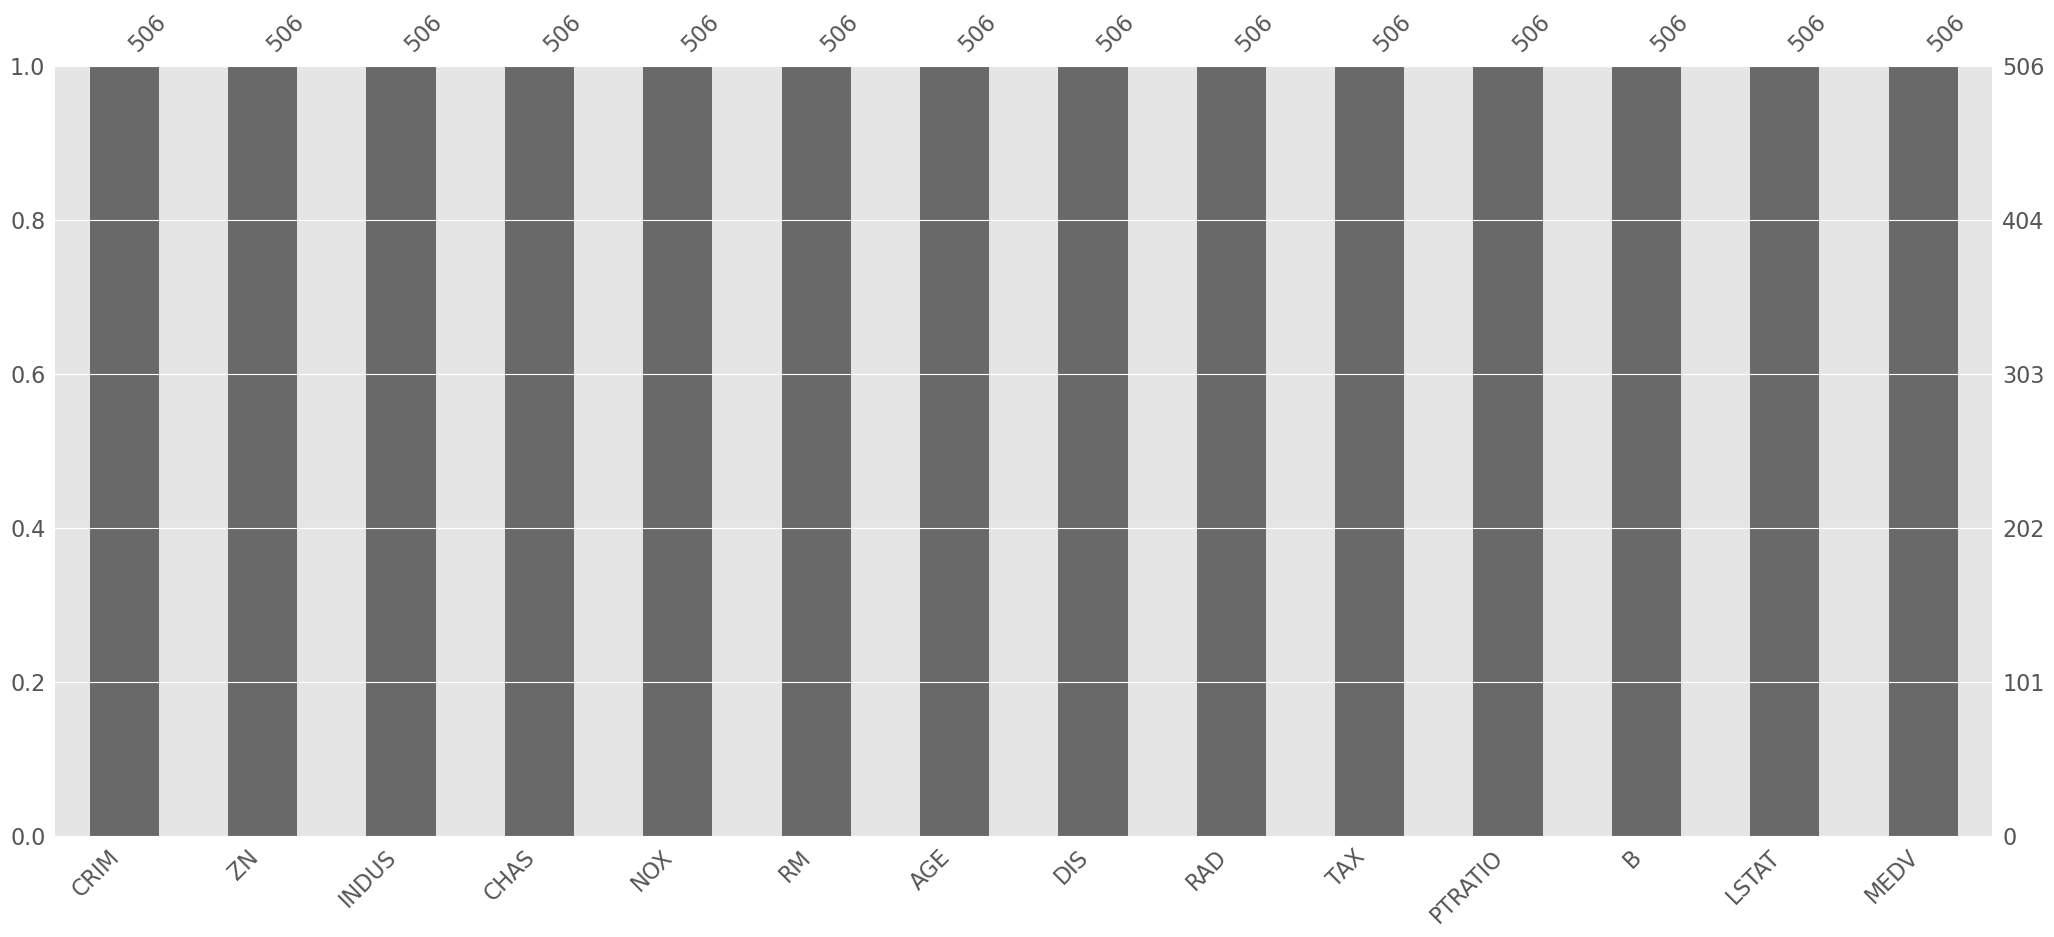

In [12]:
# Barplot de los nans
# ==================
msno.bar(df)
plt.show()

Al parecer no tenemos Nan o null.

<div class="alert alert-block alert-info">
    <b>Visualización variables</b></div>

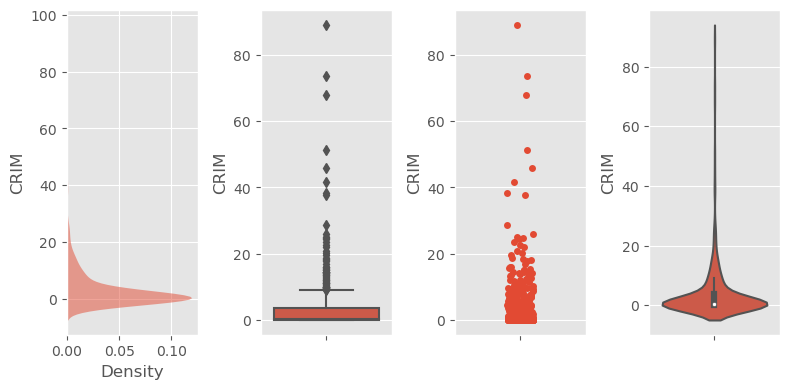

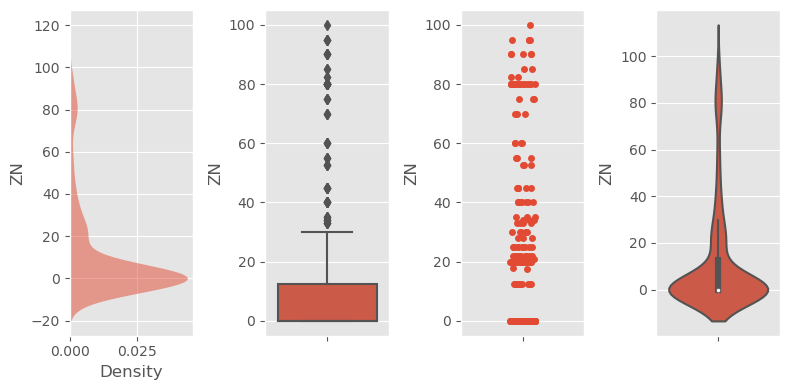

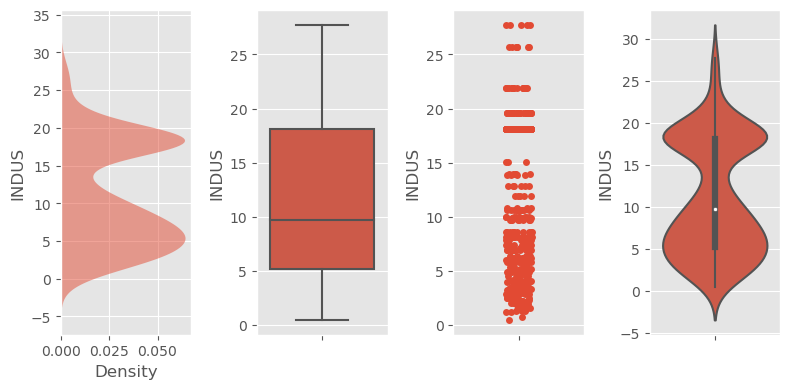

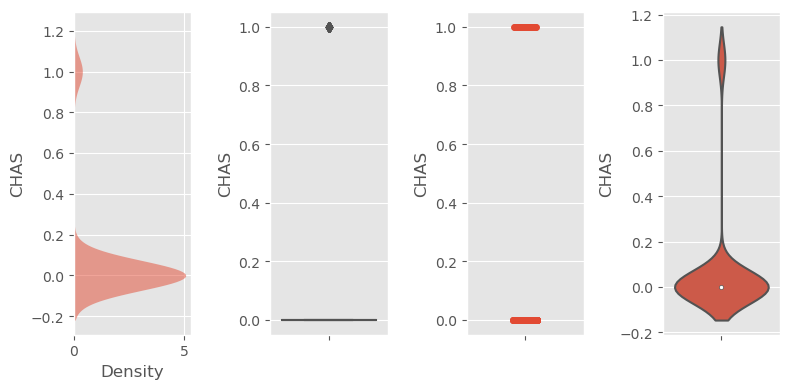

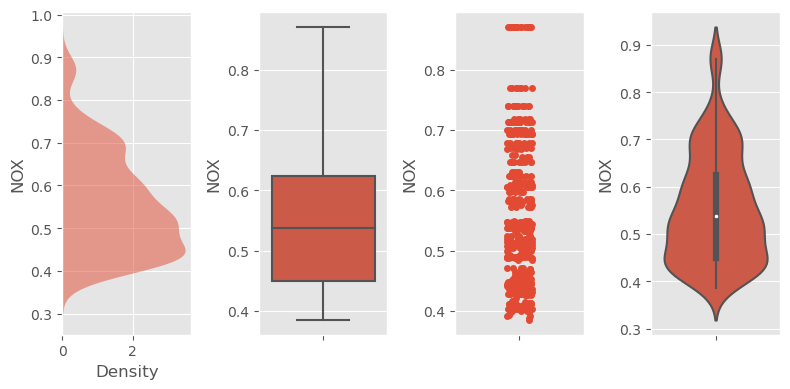

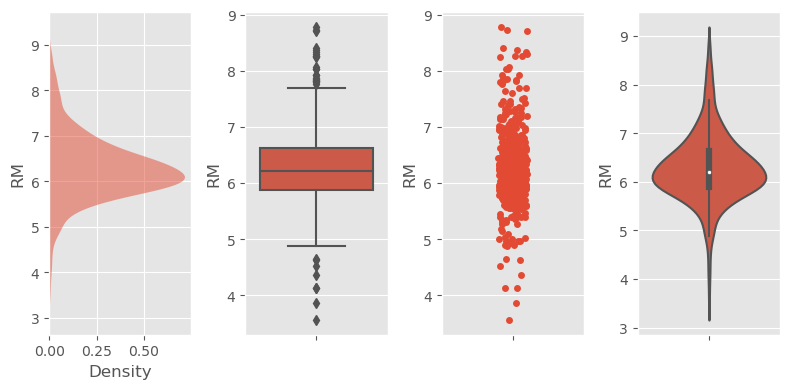

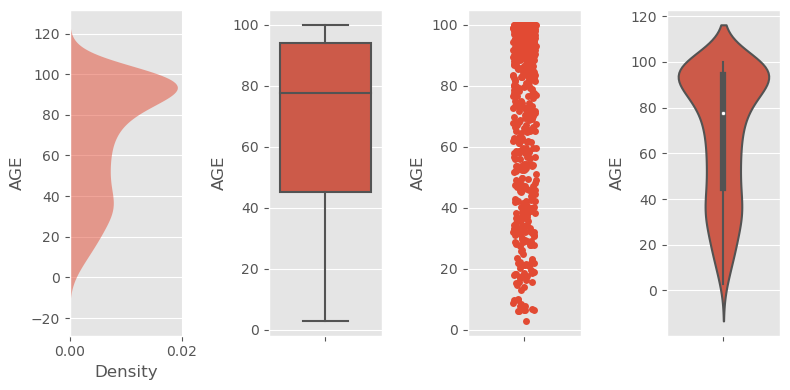

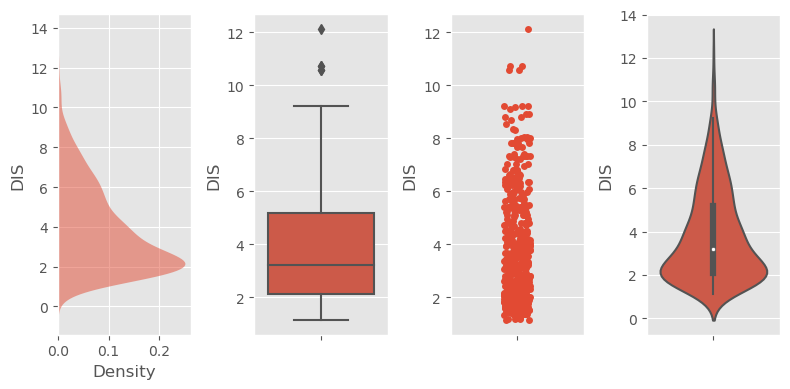

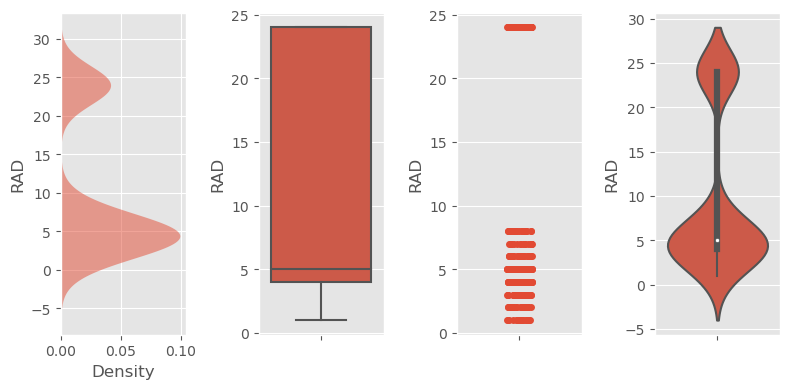

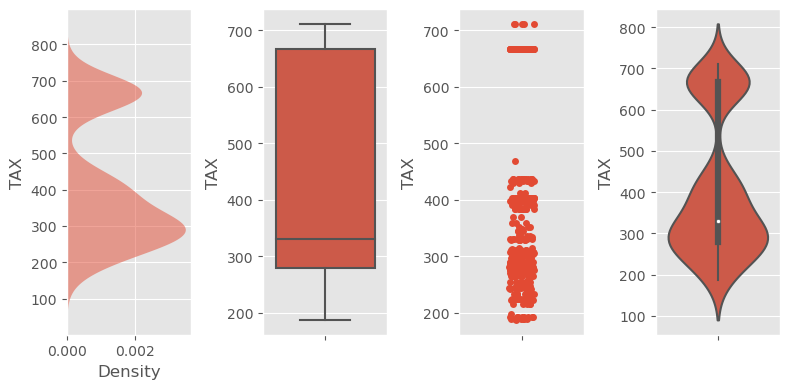

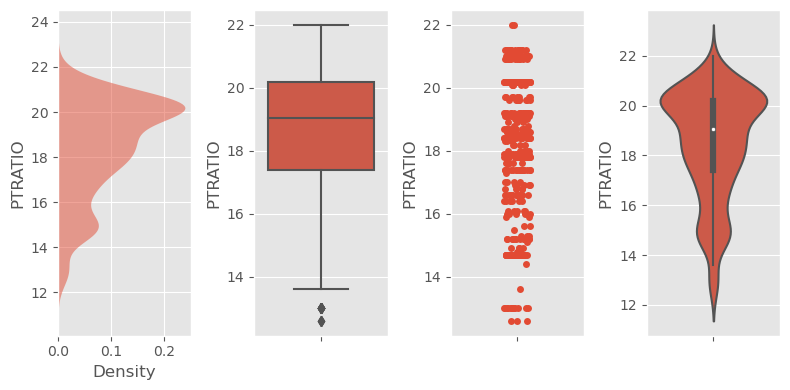

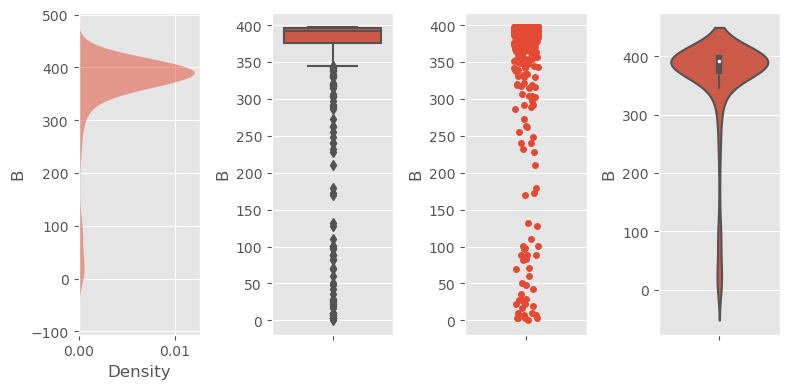

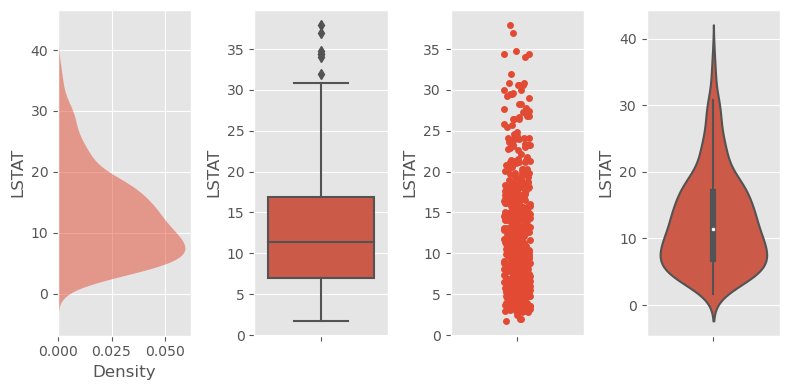

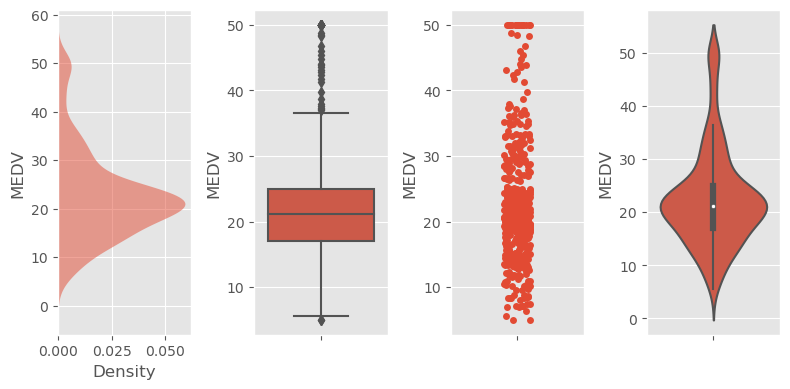

In [13]:
# Distribuciones: densidad, boxplot, astripchart, violinplot
# =======================================================================
for i in df:
    fig, axs = plt.subplots(ncols=4, figsize=(8, 4))
    sns.kdeplot(
       data=df, y=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=df, y=i,ax=axs[1])
    sns.stripplot(y= i,data=df,ax=axs[2])
    sns.violinplot(data=df, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

In [14]:
# Utilizamos el test de shapiro para verificar la hipótesis de una distribución normal
# ==============================================================================
for i in df:

    stat, p = stats.shapiro(df[i])
    print(f" {i} p-value = {p}")
    alpha = 0.05
    if p > alpha:
       print(f'no se rechaza la hipótesis nula H0')
    else:
       print(f'se rechaza la hipótesis nula H0')

 CRIM p-value = 1.3285678005931464e-36
se rechaza la hipótesis nula H0
 ZN p-value = 7.882576753156324e-34
se rechaza la hipótesis nula H0
 INDUS p-value = 1.0642375893751083e-17
se rechaza la hipótesis nula H0
 CHAS p-value = 2.350467979135232e-40
se rechaza la hipótesis nula H0
 NOX p-value = 5.775851259944009e-14
se rechaza la hipótesis nula H0
 RM p-value = 2.4107271734408187e-10
se rechaza la hipótesis nula H0
 AGE p-value = 2.2311304847966706e-18
se rechaza la hipótesis nula H0
 DIS p-value = 2.1851281171594835e-17
se rechaza la hipótesis nula H0
 RAD p-value = 8.072354053650428e-30
se rechaza la hipótesis nula H0
 TAX p-value = 1.1629790572690724e-23
se rechaza la hipótesis nula H0
 PTRATIO p-value = 2.359104548622454e-17
se rechaza la hipótesis nula H0
 B p-value = 6.057845995608311e-36
se rechaza la hipótesis nula H0
 LSTAT p-value = 8.285112504911873e-14
se rechaza la hipótesis nula H0
 MEDV p-value = 4.939965499209636e-16
se rechaza la hipótesis nula H0


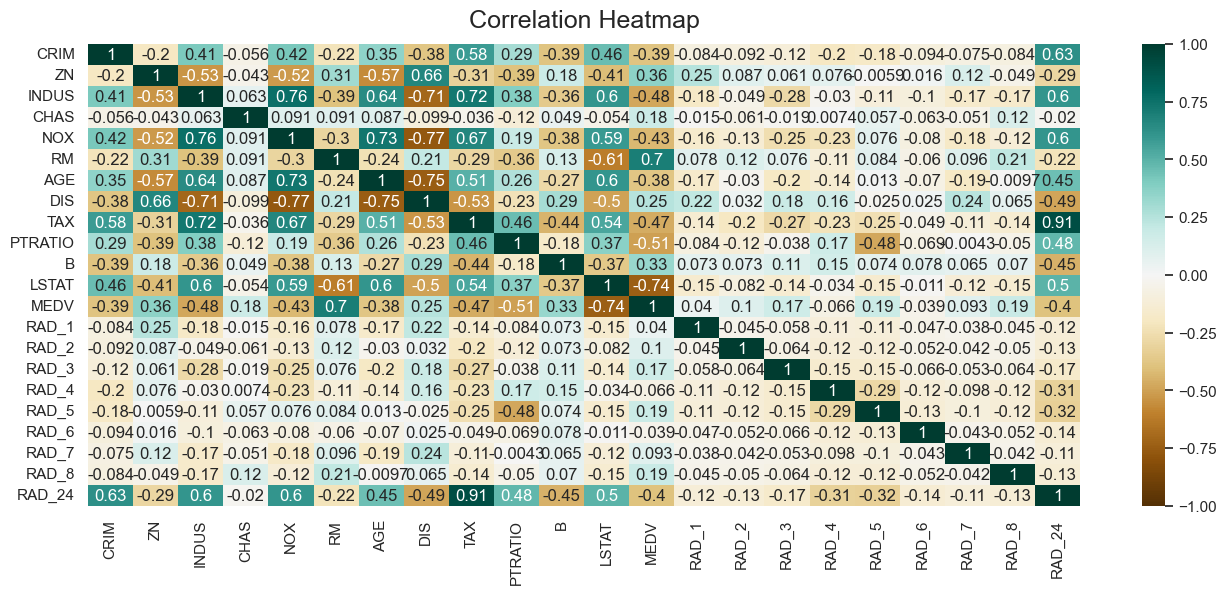

In [37]:
#Visualizamos la correlación entre variables
# =======================================================================
plt.figure(figsize=(16, 6))
matrix = np.triu(df.corr())
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.show()

IndexError: index 15 is out of bounds for axis 0 with size 15

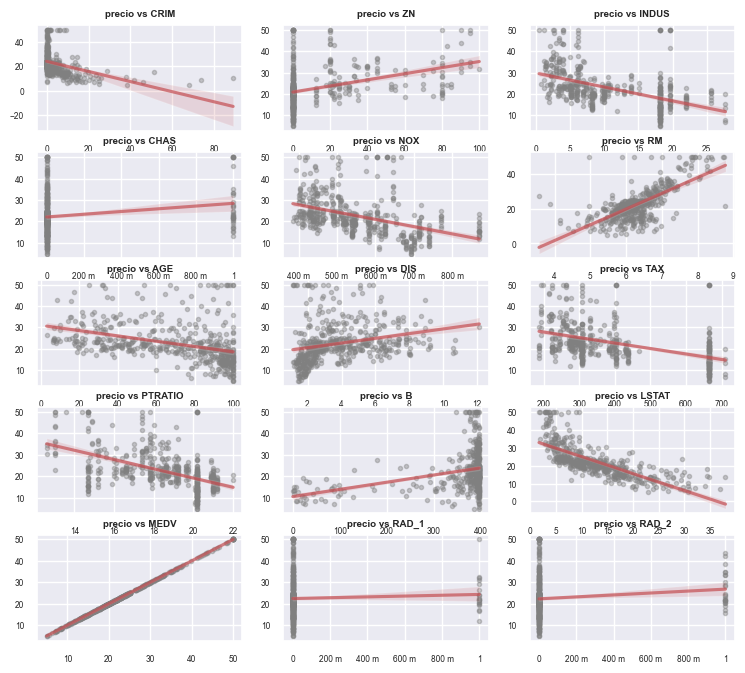

In [38]:
# Gráfico de distribución para cada variable numérica en relación a la variable target
# ==============================================================================
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(9, 8))
axes = axes.flat

for i, colum in enumerate(df):
    sns.regplot(
        x           = df[colum],
        y           = df['MEDV'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

#Se eliminan los axes vacíos
#=============================
for i in [14]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución', fontsize = 10, fontweight = "bold");

In [ ]:
#Correlacion de 'MEDV' con las otras variables
# ==============================================
df.corr()['MEDV'].sort_values(ascending=False)

Usamos el VIF (Factor de Inflación de la Varianza). En general, una correlación puede ser problematica cuando su VIF > 5.

In [ ]:
# Crear funcion que calcule el VIF
# ==============================================
def compute_vif(considered_features):
    
    X = df[considered_features]
    # el calculo de la inflación de varianza requiere de una constante
    X['intercept'] = 1
    
    # se crea un dataframe para guardar las vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

#variables consideradas
considered_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']


# calculo del vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

In [ ]:
# scatterplot para visualizar mejor RAD and TAX
# ================================================
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

In [ ]:
# comprobamos que pasaría si eliminasemos los outliers
# =================================================
df1 = df[df['TAX'] < 500]

# calculating the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

__Finalmente, podemos ver que:__
* 'CRIM', 'ZN', 'DIS', 'PRATIO', 'B' y 'LSTAT' tienen outliers que trataremos con un robustscaler.
* 'INDUS', 'NOX', 'AGE'y 'TAX' se trataran con un minmaxscaler.
* La correlación fuerte entre 'TAX' y 'RAD' se debe a los outliers.
* 'CHAS' no se tratara.
* 'Aplicaremos encoding a 'RAD'.

In [ ]:
rad_dummies = pd.get_dummies(df['RAD'], prefix='RAD')

# Concatenar las variables dummy al conjunto de datos original
df = pd.concat([df, rad_dummies], axis=1)

df.drop('RAD', axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
# Partimos los datos
# ===============================
X = df.drop('MEDV', axis = 1)
y = df['MEDV'] 

In [39]:
# Se guarda una copia X e Y
# ================================
X_original = X.copy()
y_original =  y.copy()

In [40]:
# X, Y shape
# ===============================
print("X shape: ", X.shape)
print("Y shape: ", y.shape)

X shape:  (506, 21)
Y shape:  (506,)


In [41]:
# Robust scaler
#===================
robust_scaler = RobustScaler()

# Se aplica ek RobustScaler a las variables seleccionadas en X
#=============================================================
X[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']] = robust_scaler.fit_transform(X[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']])

In [42]:
# MinMax scaler
#===================
minmax_scaler = MinMaxScaler()

# Se aplicar MinMaxScaler a las variables seleccionadas en X
#=============================================================
X[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']] = minmax_scaler.fit_transform(X[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']])

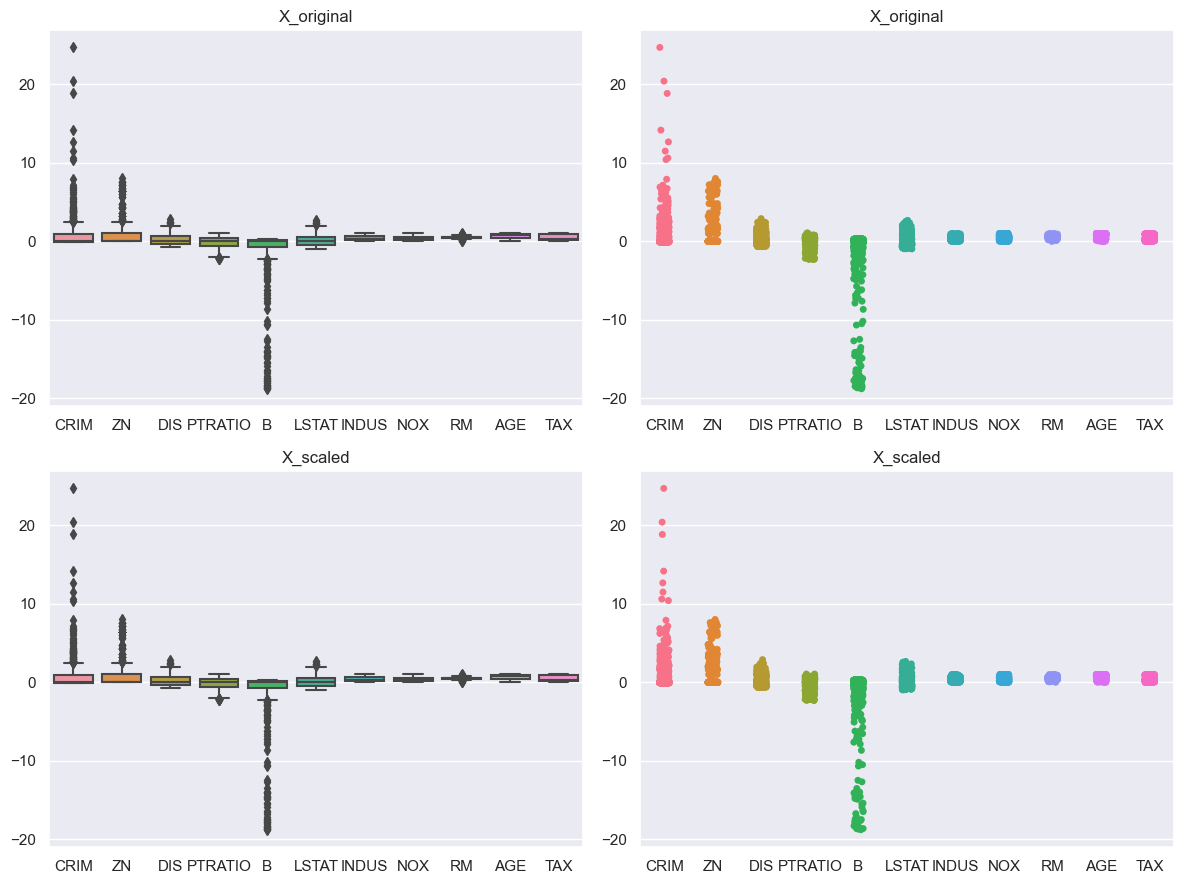

In [43]:
# Visualizamos X_train and X_test
# =========================================
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

plot1=sns.boxplot(data=X_original[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT','INDUS', 'NOX', 'RM', 'AGE', 'TAX']], ax=ax[0, 0])
ax[0, 0].set_title('X_original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

plot2=sns.stripplot(data=X_original[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT','INDUS', 'NOX', 'RM', 'AGE', 'TAX']], ax=ax[0,1])
ax[0, 1].set_title('X_original')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

plot1=sns.boxplot(data=X[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT','INDUS', 'NOX', 'RM', 'AGE', 'TAX']], ax=ax[1,0])
ax[1, 0].set_title('X_scaled')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

plot2=sns.stripplot(data=X[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT','INDUS', 'NOX', 'RM', 'AGE', 'TAX']], ax=ax[1,1])
ax[1, 1].set_title('X_scaled')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

fig.tight_layout()

plt.show()


In [44]:
# Dividimos los datos en conjuntos de entrenamiento y prueba con una proporción de 80/20
# El random_state hara que la muestra sea siempre la misma.
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 21)
(102, 21)
(404, 1)
(102, 1)


In [46]:
# Comprobamos que la matrix X sea singular. La falta de un rango completo seria fuerte indicador de collinearidad
# ================================================================================================================
print("Rank of X:", matrix_rank(X_train))

Rank of X: 21


<div class="alert alert-info" role="alert">
  <strong>Exercici 1:</strong> 
    <p> Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.</p>
</div>

* Modelo LR

In [47]:
# Se crea un modelo LR
# =======================
lr_model = LinearRegression()

# Se Entrena el modelo
lr_model.fit(X_train, y_train)

# Coeficienetes obtenidos
print ("Coefficient: \n", lr_model.coef_)

# Intercept(valor donde corta el eje Y)
print ("Intercept: \n", lr_model.intercept_)

Coefficient: 
 [[-0.41394818  0.48838948  1.57144093  2.58667334 -8.73643487 22.37521272
  -0.73907928 -4.73607466 -3.29944246 -2.53147647  0.26157753 -5.08835097
  -2.78080689 -1.70747132  1.94056042 -0.98051731 -0.10033056 -2.39349463
   1.56862818  1.35796775  3.09546437]]
Intercept: 
 [15.83878205]


* Modelo Ridge

In [48]:
# Se crea un modelo de Ridge Regression
# ======================================
ridge_model = Ridge(alpha=1.0)

# Se entrena el modelo
ridge_model.fit(X_train, y_train)

# Coeficienetes obtenidos
print ("Coefficient: \n", ridge_model.coef_)

# Intercept(valor donde corta el eje Y)
print ("Intercept: \n", ridge_model.intercept_)

# Número de iteraciones realizadas durante el proceso de ajuste del modelo 
print("Number of Iterations: \n", ridge_model.n_iter_)

Coefficient: 
 [[-0.41068138  0.50423959  0.35256272  2.58156352 -7.30804174 17.93928058
  -0.43578721 -4.66953138 -2.59184113 -2.58622315  0.25162799 -5.6568715
  -2.65268028 -1.29679171  1.97984449 -1.04402394 -0.30882971 -2.51437256
   1.61577919  1.56994975  2.65112477]]
Intercept: 
 [17.78583484]
Number of Iterations: 
 None


* Modelo KNN

In [49]:
# Se crea el modelo de Regresión KNN
# ==========================================================
knn_model = KNeighborsRegressor(n_neighbors=5)

# Se entrena el modelo
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

* Modelo Random Forest

In [50]:
# Se crea el modelo de regresión Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Se entrena el modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<div class="alert alert-info" role="alert">
  <strong>Exercici 2:</strong> 
    <p> Compara’ls en base al MSE i al R2.</p>
</div>

### Evaluación de los modelos

In [51]:
# Modelo LR con x_test 
# ==================
print("LR model performance for testing set")
print("--------------------------------------")

# Se realiza predicciones en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)

# MSE
print("Mean squared error (MSE): \n", mean_squared_error(y_test, y_pred_lr))

# Se calcula el coeficiente de determinación (R^2)
print("Coefficient R^2 (1 is perfect prediction):\n", r2_score(y_test, y_pred_lr))

LR model performance for testing set
--------------------------------------
Mean squared error (MSE): 
 24.818442738481384
Coefficient R^2 (1 is perfect prediction):
 0.6615687658684799


In [52]:
# Modelo Ridge con x_test
# ====================
print("Ridge model performance for testing set")
print("--------------------------------------")

# Se realiza predicciones en el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test)

# MSE
print("Mean squared error (MSE): \n",  mean_squared_error(y_test, y_pred_ridge))


# Se calcula el coeficiente de determinación (R^2))
print("Coefficient R^2 (1 is perfect prediction): \n", r2_score(y_test, y_pred_ridge))


Ridge model performance for testing set
--------------------------------------
Mean squared error (MSE): 
 23.799492844119936
Coefficient R^2 (1 is perfect prediction): 
 0.6754634519251614


In [53]:
# Modelo KNN con x_test
# ==================
print("KNN model performance for testing set")
print("--------------------------------------")

# Se realiza predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# MSE
print("Mean squared error (MSE): \n", mean_squared_error(y_test, y_pred_knn))

# Se calcula el coeficiente de determinación (R^2)
print("Coefficient R^2 (1 is perfect prediction): \n", r2_score(y_test, y_pred_knn))

KNN model performance for testing set
--------------------------------------
Mean squared error (MSE): 
 30.957505882352933
Coefficient R^2 (1 is perfect prediction): 
 0.5778547819539956


In [54]:
# Modelo Random Forest con x_test
# =================================
print("Random Forest performance for testing set")
print("--------------------------------------")

# Se realiza predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)
y_pred_rf = np.array(y_pred_rf)
y_pred_rf= y_pred_rf.reshape(-1, 1)

# MSE
print("Mean squared error (MSE): \n", mean_squared_error(y_test, y_pred_rf))

# Se calcula el coeficiente de determinación (R^2)
print("Coefficient R^2 (1 is perfect prediction): \n", r2_score(y_test, y_pred_rf))

Random Forest performance for testing set
--------------------------------------
Mean squared error (MSE): 
 8.21951259803922
Coefficient R^2 (1 is perfect prediction): 
 0.887916424820609


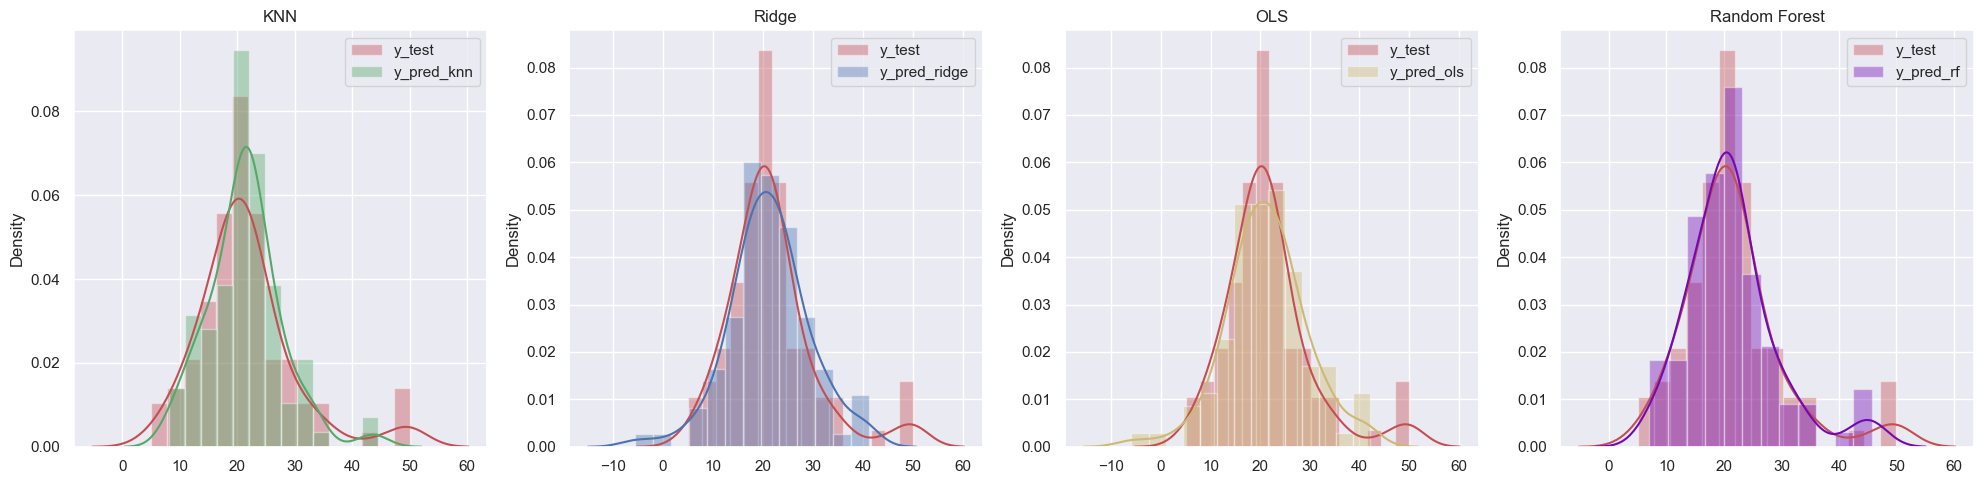

In [55]:
# Visualización distribución de los datos en relacion con Y test
# ==============================================================
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.set(color_codes=True)

# Gráfica 1: KNN
sns.distplot(y_test, color='r', kde=True, norm_hist=True, label='y_test', ax=axes[0])
sns.distplot(y_pred_knn, color='g', kde=True, norm_hist=True, label='y_pred_knn', ax=axes[0])
axes[0].set_title('KNN')
axes[0].set_ylabel('Density')
axes[0].legend()

# Gráfica 2: Ridge
sns.distplot(y_test, color='r', kde=True, norm_hist=True, label='y_test', ax=axes[1])
sns.distplot(y_pred_ridge, color='b', kde=True, norm_hist=True, label='y_pred_ridge', ax=axes[1])
axes[1].set_title('Ridge')
axes[1].set_ylabel('Density')
axes[1].legend()

# Gráfica 3: Regresión lineal ordinaria (LR)
sns.distplot(y_test, color='r', kde=True, norm_hist=True, label='y_test', ax=axes[2])
sns.distplot(y_pred_lr, color='y', kde=True, norm_hist=True, label='y_pred_ols', ax=axes[2])
axes[2].set_title('OLS')
axes[2].set_ylabel('Density')
axes[2].legend()

# Gráfica 4: Random Forest
sns.distplot(y_test, color='r', kde=True, norm_hist=True, label='y_test', ax=axes[3])
sns.distplot(y_pred_rf, color='#7209B7', kde=True, norm_hist=True, label='y_pred_rf', ax=axes[3])
axes[3].set_title('Random Forest')
axes[3].set_ylabel('Density')
axes[3].legend()

plt.tight_layout()
plt.show()

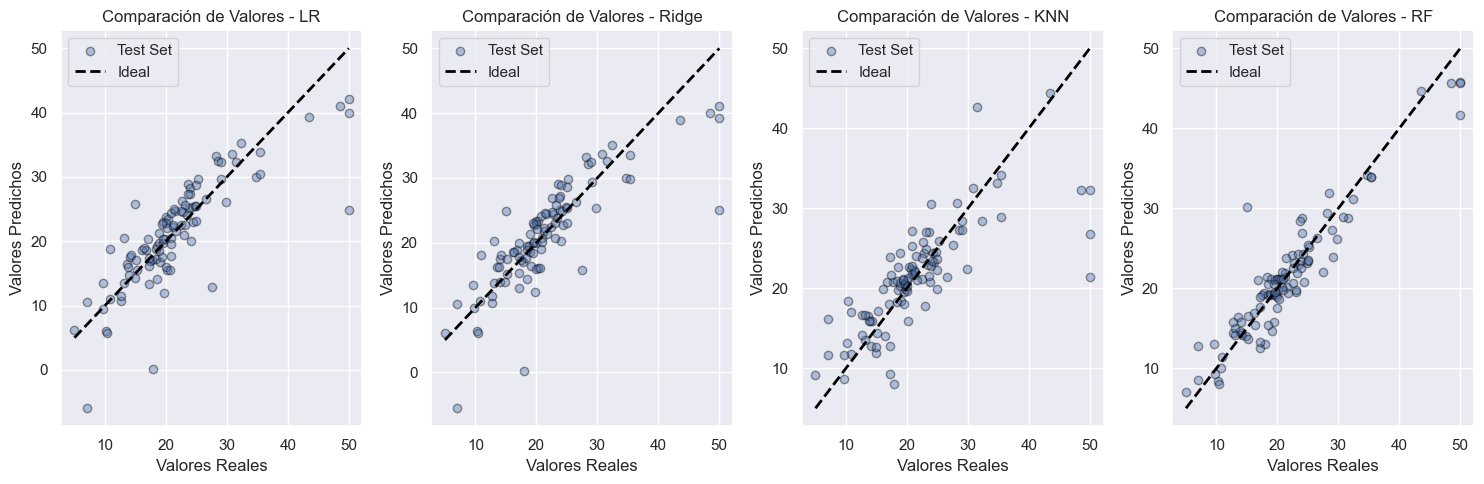

In [56]:
# Scatter plot de la distribucion de los datos
# ====================================================
fig, axes = plt.subplots(1, 4, figsize=(15,5))

# OLS
axes[0].scatter(y_test, y_pred_lr, edgecolors=(0, 0, 0), alpha = 0.4, label='Test Set') 
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', color = 'black', lw=2, label='Ideal')
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Valores Predichos')
axes[0].set_title('Comparación de Valores - LR')
axes[0].legend()

# Ridge
axes[1].scatter(y_test, y_pred_ridge, edgecolors=(0, 0, 0), alpha = 0.4, label='Test Set')  
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'black', lw=2, label='Ideal')
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Valores Predichos')  
axes[1].set_title('Comparación de Valores - Ridge')
axes[1].legend()

# KNN
axes[2].scatter(y_test, y_pred_knn, edgecolors=(0, 0, 0), alpha = 0.4, label='Test Set')  
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'black', lw=2, label='Ideal')    
axes[2].set_xlabel('Valores Reales')
axes[2].set_ylabel('Valores Predichos')
axes[2].set_title('Comparación de Valores - KNN')  
axes[2].legend()

# RF
axes[3].scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0), alpha = 0.4, label='Test Set')  
axes[3].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'black', lw=2, label='Ideal')    
axes[3].set_xlabel('Valores Reales')
axes[3].set_ylabel('Valores Predichos')
axes[3].set_title('Comparación de Valores - RF')  
axes[3].legend()

plt.tight_layout()
plt.show()

**Por los resultados obtenidos parece que el modelo que mejor se ajusta es el Random Forest.**

<div class="alert alert-info" role="alert">
  <strong>Exercici 3:</strong> 
    <p> Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció..</p>
</div>

#### Intentaremos mejorar los modelos cambiando los parametros disponibles.

* Mejora del modelo LR con GridSearch

In [60]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [61]:
# # Se definen los hiperparámetros para buscar por el Modelo LR
# ==============================================================
lr_model_parameters = {
    'fit_intercept': [True, False],
    'positive' : [True, False],
    'copy_X' : [True, False]
}
lr_grid = GridSearchCV(lr_model, lr_model_parameters, cv=5, scoring='r2')
lr_grid.fit(X_train, y_train)

# Visualizamos el Score
print("Mejor score:", lr_grid.best_score_)


# Visualizamos los Hiperparametros
print("Mejores hiperparámetros:", lr_grid.best_params_)

Mejor score: 0.733105865887455
Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': False, 'positive': False}


Al parecer para el modelo LR los parametros no cambian, pero creamos de todos modos un nuevo modelo para futuras comparaciones.

In [62]:
# Se obtienen los mejores hiperparámetros encontrados
lr_best_parameters =lr_grid.best_params_

# Se crea un nuevo modelo OLS con los hiperparámetros optimizados
lr_best = LinearRegression(**lr_best_parameters)

# Se Ajusta el modelo con los datos
lr_best.fit(X_train, y_train)

# Se visualiza el nuevo modelo con los nuevos parametros
lr_best.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

* Mejora del modelo Ridge con RandomizedSearchCV

In [63]:
# Parametros del modelo
# ========================
ridge_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [64]:
# Se definien los hiperparámetros para buscar por el Modelo Ridge
# =============================================================
ridge_model_parameters = {
    'alpha': (0.1, 10.0),
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'max_iter': [None, 1000, 5000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'tol': (0.0001, 1.0)
}
ridge_random = RandomizedSearchCV(ridge_model, ridge_model_parameters, n_iter=10, cv=5, scoring='r2', random_state=42)
ridge_random.fit(X_train, y_train)

# Se visualiza el score 
print("Mejor puntuación:", ridge_random.best_score_)

# Se visualizan los mejores hiperparametros
print("Mejores hiperparámetros:", ridge_random.best_params_)

Mejor puntuación: 0.7332694333224926
Mejores hiperparámetros: {'tol': 0.0001, 'solver': 'saga', 'max_iter': 1000, 'fit_intercept': True, 'copy_X': False, 'alpha': 0.1}


In [65]:
# Se obtienen los mejores hiperparámetros encontrados
ridge_best_parameters = ridge_random.best_params_

# Se crea un nuevo modelo Ridge con los hiperparámetros optimizados
ridge_best = Ridge(**ridge_best_parameters)

# Se Ajusta el modelo con los datos
ridge_best.fit(X_train, y_train)

# Se visualiza el nuevo modelo con los nuevos parametros
ridge_best.get_params()

{'alpha': 0.1,
 'copy_X': False,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001}

* Mejora del modelo KNN con BayesSearch

In [66]:
# Parametros del modelo
# ========================
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [67]:
# Se definien los hiperparámetros para buscar por el KNN
# =============================================================
knn_model_parameters = {
    'n_neighbors': (1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': (5, 40),
    'p': (1, 2)
}

# Realizar la búsqueda de hiperparámetros utilizando BayesSearchCV
knn_bs = BayesSearchCV(knn_model, knn_model_parameters, cv=5, scoring='r2', n_jobs=-1, n_iter=10, random_state=42)
knn_bs.fit(X_train, y_train)

# Se visualiza el score 
print("Mejor puntuación:", knn_bs.best_score_)

# Se visualizan los mejores hiperparametros
print("Mejores hiperparámetros:", knn_bs.best_params_)

Mejor puntuación: 0.730799855027151
Mejores hiperparámetros: OrderedDict([('algorithm', 'auto'), ('leaf_size', 34), ('metric', 'manhattan'), ('n_neighbors', 6), ('p', 2), ('weights', 'distance')])


In [68]:
# Se obtienen los mejores hiperparámetros encontrados
knn_best_parameters = knn_bs.best_params_

# Se crea un nuevo modelo KNN con los hiperparámetros optimizados
knn_best = KNeighborsRegressor(**knn_best_parameters)

# Se Ajusta el modelo con los datos
knn_best.fit(X_train, y_train)

# Se visualiza el nuevo modelo con los nuevos parametros
knn_best.get_params()

{'algorithm': 'auto',
 'leaf_size': 34,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'distance'}

Mejora del modelo Random Forest con BayesSearch

In [69]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [70]:
# Se definien los hiperparámetros para buscar por el RF
# =============================================================
rf_model_parameters = {
   'n_estimators': (5, 500),
    'max_depth': (1, 10),
    'min_samples_split': (1, 10),
    'min_samples_leaf': (1, 6),
    'max_features': (0.1, 1.0, 'uniform'),
    'bootstrap': [True, False],
}

#Realizar la búsqueda de hiperparámetros utilizando BayesSearchCV
rf_bs = BayesSearchCV(rf_model, rf_model_parameters, cv=5, scoring='r2', n_jobs=-1, n_iter=10, random_state=42)
rf_bs.fit(X_train, y_train)

# Se visualiza el score 
print("Mejor puntuación:", rf_bs.best_score_)

# Se visualizan los mejores hiperparametros
print("Mejores hiperparámetros:", rf_bs.best_params_)

Mejor puntuación: 0.8283644858657814
Mejores hiperparámetros: OrderedDict([('bootstrap', True), ('max_depth', 9), ('max_features', 0.24724646077469525), ('min_samples_leaf', 2), ('min_samples_split', 8), ('n_estimators', 189)])


In [71]:
# Se obtienen los mejores hiperparámetros encontrados
rf_best_parameters = rf_bs.best_params_

# Se crea un nuevo modelo Ridge con los hiperparámetros optimizados
rf_best = RandomForestRegressor(**rf_best_parameters, random_state=42)

# Se Ajusta el modelo con los datos
rf_best.fit(X_train, y_train)

# Se visualiza el nuevo modelo con los nuevos parametros
rf_best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 0.24724646077469525,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 189,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

<div class="alert alert-info" role="alert">
  <strong>Exercici 4:</strong> 
    <p> Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).</p>
</div>

In [72]:
# Se validan los modelos usando Cross_Validation_score y se comparan con X_test
# =============================================================================
# Modelos
models = [
    ('LR', lr_model),
    ('Ridge', ridge_model),
    ('KNN', knn_model),
    ('RF', rf_model),
    ('LR_Best', lr_best),
    ('Ridge_Best', ridge_best),
    ('KNN_best', knn_best),
    ('RF_Best', rf_best)
]

# Cross-validation score
cv_scores = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append((name, scores.mean()))

# Test set score
test_scores = []
test_mse_scores = []
for name, model in models:
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    test_scores.append((name, score))
    test_mse_scores.append((name, mse_score))

# Comparamos modelos
for i in range(len(models)):
    print(f"{models[i][0]} - CV Score Mean: {cv_scores[i][1]:.4f}  Test Score: {test_scores[i][1]:.4f}  MSE: {test_mse_scores[i][1]:.4f}  RMSE: {test_mse_scores[i][1]**0.5:.4f}")

LR - CV Score Mean: 0.7331  Test Score: 0.6616  MSE: 24.8184  RMSE: 4.9818
Ridge - CV Score Mean: 0.7308  Test Score: 0.6755  MSE: 23.7995  RMSE: 4.8785
KNN - CV Score Mean: 0.6606  Test Score: 0.5779  MSE: 30.9575  RMSE: 5.5639
RF - CV Score Mean: 0.8234  Test Score: 0.8879  MSE: 8.2195  RMSE: 2.8670
LR_Best - CV Score Mean: 0.7331  Test Score: 0.6616  MSE: 24.8184  RMSE: 4.9818
Ridge_Best - CV Score Mean: 0.7333  Test Score: 0.6680  MSE: 24.3493  RMSE: 4.9345
KNN_best - CV Score Mean: 0.7308  Test Score: 0.5968  MSE: 29.5715  RMSE: 5.4380
RF_Best - CV Score Mean: 0.8284  Test Score: 0.8306  MSE: 12.4255  RMSE: 3.5250


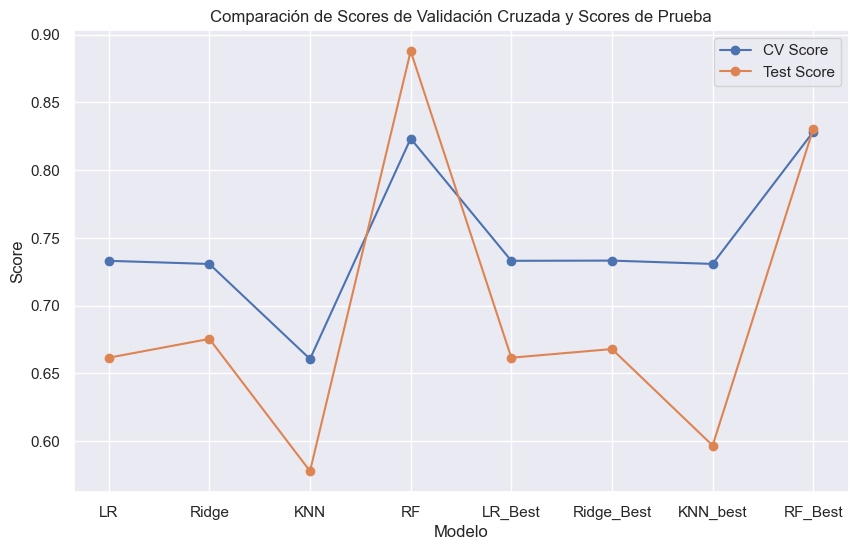

In [73]:
# Grafico de los resultados
# ====================================
# Se obtienen los nombres de los modelos
model_names = [model[0] for model in models]

# Se obtienen los scores de validación cruzada y scores de prueba
cv_scores = [score for _, score in cv_scores]
test_scores = [score for _, score in test_scores]

fig, ax = plt.subplots(figsize=(10, 6))

# Se grafican los scores de validación cruzada y scores de prueba
ax.plot(model_names, cv_scores, marker='o', label='CV Score')
ax.plot(model_names, test_scores, marker='o', label='Test Score')

ax.set_title('Comparación de Scores de Validación Cruzada y Scores de Prueba')
ax.set_xlabel('Modelo')
ax.set_ylabel('Score')
ax.legend()

plt.show()

**En conclusion:**
- La puntuación baja de los modelo LR y Ridge podria deberse a underfits y a que no hayan capturado de manera adecuada las relaciones no lineales o complejas en los datos. No parecen la mejor opcion para manejar los datos tal y como estan.
- La performance poco positiva del modelo KNN, que ha sido incapaz de una mejora significativa tras los ajustes, podria deberse a que dichos modelos son sensible al ruido y los valores atípicos.
- El modelo RF, a pesar de que su performance se ha visto levemente afectada tras manipular los parametros, ha sido el que mejores resultados ha obtenido, logrando una precision de mas del 80% y un MSE mas bajo. Al parecer es el que mejor se ha adaptado, que mejor ha capturado las relaciones entre los datos y con menor discrepancia entre las predicciones y los valores reales. 

<div class="alert alert-info" role="alert">
  <strong>Exercici 5:</strong> 
    <p> No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.</p>
</div>

In [74]:
# Comprobamos la importancia de las features con la variable target
# ==================================================================
selector = SelectKBest(score_func=f_regression, k=5)  # Se seleccionarán las 5 mejores

# Se aplica la selección al conjunto de datos
X_selected = selector.fit_transform(X_train, y_train)

# OSe obtienen las puntuaciones de importancia de las características
feature_scores = selector.scores_
selected_indices = selector.get_support(indices=True)

# Bucle para visualizar todas las variables junto a su importancia
for i, score in enumerate(feature_scores):
    feature_name = X_train.columns[i]
    print("Importancia {}: {:.2f}".format(feature_name, score))

#Visualizamos las 5 mejores    
print("Top 5 Features:")
for i in selected_indices:
    feature_name = X_train.columns[i]
    print(feature_name)

Importancia CRIM: 67.88
Importancia ZN: 42.59
Importancia INDUS: 114.32
Importancia CHAS: 15.16
Importancia NOX: 84.01
Importancia RM: 410.23
Importancia AGE: 52.62
Importancia DIS: 23.52
Importancia TAX: 107.77
Importancia PTRATIO: 127.84
Importancia B: 52.52
Importancia LSTAT: 476.34
Importancia RAD_1: 0.74
Importancia RAD_2: 4.63
Importancia RAD_3: 14.89
Importancia RAD_4: 5.33
Importancia RAD_5: 16.23
Importancia RAD_6: 0.60
Importancia RAD_7: 4.17
Importancia RAD_8: 16.17
Importancia RAD_24: 78.33
Top 5 Features:
INDUS
RM
TAX
PTRATIO
LSTAT


**Se observa que 'RM' es una de las mas importantes.**

In [75]:
# Eliminamos la variable RM
# ========================================
X_train = X_train.drop(columns = 'RM')
X_test  = X_test.drop(columns = 'RM')

In [76]:
print(X_train.shape)
print(X_test.shape)

(404, 20)
(102, 20)


In [77]:
# Se crea un nuevo modelo LR
# ===============================================
lr_model_new = LinearRegression()

# Se Entrena el modelo
lr_model_new.fit(X_train, y_train)

# Se crea un nuevo modelo de Regresión KNN
# ==========================================================
knn_model_new = KNeighborsRegressor(n_neighbors=5)

# Se entrena el modelo
knn_model_new.fit(X_train, y_train)

# Se crea un nuevo modelo de regresión Random Forest
# ==================================================
rf_model_new = RandomForestRegressor(n_estimators=100, random_state=42)

# Se entrena el modelo
rf_model_new.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
# Se validan los modelos usando Cross_Validation_score y se comparan con X_test añadiendo tambien MSE y RMSE
# ==============================================================================================================
models = [
    ('LR_new', lr_model_new),
    ('KNN_new', knn_model_new),
    ('RF_new', rf_model_new)
]

# Cross-validation score
cv_scores = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append((name, scores.mean()))

# Test set score
test_scores = []
test_mse_scores = []
for name, model in models:
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    test_scores.append((name, score))
    test_mse_scores.append((name, mse_score))

# Comparamos modelos
for i in range(len(models)):
    print(f"{models[i][0]} - CV Score Mean: {cv_scores[i][1]:.4f}  Test Score: {test_scores[i][1]:.4f}  MSE: {test_mse_scores[i][1]:.4f}  RMSE: {test_mse_scores[i][1]**0.5:.4f}")

LR_new - CV Score Mean: 0.6774  Test Score: 0.6868  MSE: 22.9655  RMSE: 4.7922
KNN_new - CV Score Mean: 0.6511  Test Score: 0.5738  MSE: 31.2545  RMSE: 5.5906
RF_new - CV Score Mean: 0.7753  Test Score: 0.8126  MSE: 13.7401  RMSE: 3.7068


**En conclusion:**
- Por los resultados, se entiende que eliminar 'RM', a pesar de su importancia como feature, no haya afectado significativamente a los resultados obtenidos por nuestros modelos.